In [1]:
import geopandas as gpd
import pandas as pd

# Mapping counties

In [4]:
counties = gpd.read_file("/srv/data/my_shared_data_folder/cpr/california_counties.gpkg")
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,NaN,NaN,NaN,A,2468694587,23299110,+39.5769252,-120.5219926,"MULTIPOLYGON (((-13431319.751 4821511.426, -13..."
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,NaN,A,2499183617,76073827,+38.4500114,-121.3404409,"MULTIPOLYGON (((-13490651.476 4680831.603, -13..."
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,NaN,42200,NaN,A,7084000598,2729814515,+34.5370572,-120.0399729,"MULTIPOLYGON (((-13423116.772 4042044.149, -13..."
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,NaN,NaN,NaN,A,2641820834,43806026,+38.1838996,-120.5614415,"MULTIPOLYGON (((-13428575.483 4627725.228, -13..."
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,NaN,A,4773390489,945942791,+34.3587415,-119.1331432,"MULTIPOLYGON (((-13317853.594 3931602.414, -13..."


<Axes: >

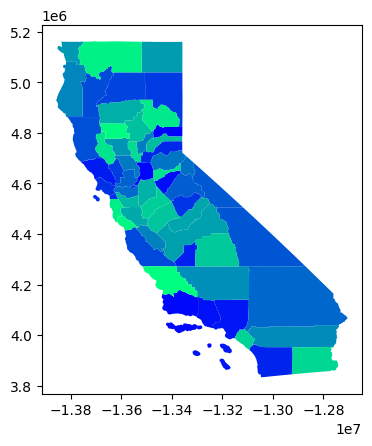

In [8]:
counties.plot(cmap='winter')

<Axes: >

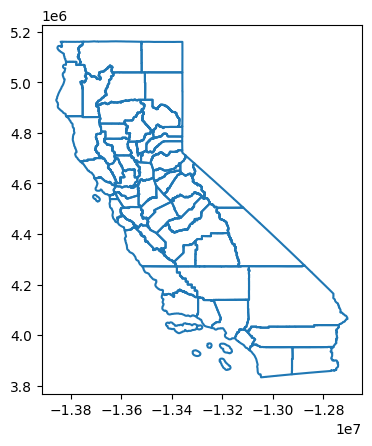

In [3]:
counties.boundary.plot()

# Exploring pesticide use 

In [80]:
ag_pur = pd.read_parquet("/srv/data/my_shared_data_folder/cpr/pur2020_ag.parquet", engine = 'fastparquet', 
                         columns = ['use_no', "lbs_chm_used", "lbs_prd_used",'acre_planted', 
                                    'acre_treated', 'applic_dt', 'applic_time', "site_loc_id",
                                    "aer_gnd_ind","chemname","REGIONNAME","site_name","county_name"])


3514174

In [81]:
ag_pur.shape

(7463686, 13)

In [113]:
ag_pur.loc[ag_pur.loc[:, "site_loc_id"]== "0718C2", :]

,use_no,lbs_chm_used,lbs_prd_used,acre_planted,acre_treated,applic_dt,applic_time,site_loc_id,aer_gnd_ind,chemname,REGIONNAME,site_name,county_name
247575,328065,NaN,30.4412,57.0,28.5,02/27/2020,900.0,0718C2,G,None,CENTRAL VALLEY,WALNUT,Stanislaus
247703,1036795,17.636007,71.9837,57.0,15.0,05/11/2020,2300.0,0718C2,G,GLUFOSINATE-AMMONIUM,CENTRAL VALLEY,WALNUT,Stanislaus
248177,2508337,NaN,46.2367,57.0,50.0,08/01/2020,2300.0,0718C2,G,None,CENTRAL VALLEY,WALNUT,Stanislaus
257923,676989,NaN,10.6228,57.0,50.0,04/16/2020,1900.0,0718C2,G,None,CENTRAL VALLEY,WALNUT,Stanislaus
268928,328062,58.973752,121.0960,57.0,28.5,02/27/2020,900.0,0718C2,G,"GLYPHOSATE, POTASSIUM SALT",CENTRAL VALLEY,WALNUT,Stanislaus
269071,1036801,7.093475,31.6673,57.0,50.0,None,2000.0,0718C2,G,SPIROTETRAMAT,CENTRAL VALLEY,WALNUT,Stanislaus
269072,1036804,NaN,93.7229,57.0,50.0,None,2000.0,0718C2,G,None,CENTRAL VALLEY,WALNUT,Stanislaus
290455,1036803,5.270208,41.4977,57.0,50.0,None,2000.0,0718C2,G,CYANTRANILIPROLE,CENTRAL VALLEY,WALNUT,Stanislaus
290819,2508336,6.753600,9.3800,57.0,50.0,08/01/2020,2300.0,0718C2,G,ETOXAZOLE,CENTRAL VALLEY,WALNUT,Stanislaus
301008,328063,21.450214,96.1893,57.0,28.5,02/27/2020,900.0,0718C2,G,OXYFLUORFEN,CENTRAL VALLEY,WALNUT,Stanislaus


In [105]:
ag_pur.loc[ag_pur.loc[:, "applic_dt"].isna(), :]

,use_no,lbs_chm_used,lbs_prd_used,acre_planted,acre_treated,applic_dt,applic_time,site_loc_id,aer_gnd_ind,chemname,REGIONNAME,site_name,county_name
269071,1036801,7.093475,31.6673,57.0,50.0,None,2000.0,0718C2,G,SPIROTETRAMAT,CENTRAL VALLEY,WALNUT,Stanislaus
269072,1036804,NaN,93.7229,57.0,50.0,None,2000.0,0718C2,G,None,CENTRAL VALLEY,WALNUT,Stanislaus
290455,1036803,5.270208,41.4977,57.0,50.0,None,2000.0,0718C2,G,CYANTRANILIPROLE,CENTRAL VALLEY,WALNUT,Stanislaus
354628,1036803,1.112138,41.4977,57.0,50.0,None,2000.0,0718C2,G,ABAMECTIN,CENTRAL VALLEY,WALNUT,Stanislaus
386495,1036802,5.470000,10.9400,57.0,50.0,None,2000.0,0718C2,G,METCONAZOLE,CENTRAL VALLEY,WALNUT,Stanislaus


In [97]:
ag_pur = ag_pur.drop_duplicates()
ag_pur.head()

,use_no,lbs_chm_used,lbs_prd_used,acre_planted,acre_treated,applic_dt,applic_time,site_loc_id,aer_gnd_ind,chemname,REGIONNAME,site_name,county_name
0,956467,6.216000,7.7700,169.53,2.59,04/08/2020,1630.0,1,G,SULFUR,NORTH COAST,"GRAPE, WINE",Sonoma
1,956473,10.680000,13.3500,169.53,4.45,04/08/2020,1630.0,1,G,SULFUR,NORTH COAST,"GRAPE, WINE",Sonoma
2,950977,NaN,0.0023,142.00,0.43,04/10/2020,811.0,131,G,None,SAN FRANCISCO BAY,"GRAPE, WINE",Sonoma
3,950981,0.015974,0.0652,142.00,0.49,04/10/2020,821.0,131,G,GLUFOSINATE-AMMONIUM,SAN FRANCISCO BAY,"GRAPE, WINE",Sonoma
4,950993,3.324537,3.9625,27.50,3.17,04/15/2020,650.0,115,G,COPPER OXIDE (OUS),NORTH COAST,"GRAPE, WINE",Sonoma


In [83]:
ag_pur.shape

(3731843, 13)

In [90]:
ag_pur["use_no"].unique().shape

(3514174,)

In [84]:
#total number of unique rows - total number of unique use_no
#difference represents the number of rows with repeated use_no
3731843 - 3514174

217669

In [94]:
3305298 + 208876

3514174

In [95]:

count_df = ag_pur.use_no.value_counts().to_frame().reset_index()

res = count_df.loc[count_df.loc[:, "count"] > 1.0, :]
res["count"].sum() - 208876

217669

In [114]:
def month(column_value):
    date = column_value
    if date == None:
        return None
    
    month_day_year = date.split("/")
    return month_day_year[0]

def day(column_value):
    date = column_value
    if date == None:
        return None
    
    month_day_year = date.split("/")
    return month_day_year[1]

In [116]:
ag_pur["month"] = ag_pur["applic_dt"].apply(month)
ag_pur["day"] = ag_pur["applic_dt"].apply(day)
ag_pur.head()

,use_no,lbs_chm_used,lbs_prd_used,acre_planted,acre_treated,applic_dt,applic_time,site_loc_id,aer_gnd_ind,chemname,REGIONNAME,site_name,county_name,month,day
0,956467,6.216000,7.7700,169.53,2.59,04/08/2020,1630.0,1,G,SULFUR,NORTH COAST,"GRAPE, WINE",Sonoma,04,08
1,956473,10.680000,13.3500,169.53,4.45,04/08/2020,1630.0,1,G,SULFUR,NORTH COAST,"GRAPE, WINE",Sonoma,04,08
2,950977,NaN,0.0023,142.00,0.43,04/10/2020,811.0,131,G,None,SAN FRANCISCO BAY,"GRAPE, WINE",Sonoma,04,10
3,950981,0.015974,0.0652,142.00,0.49,04/10/2020,821.0,131,G,GLUFOSINATE-AMMONIUM,SAN FRANCISCO BAY,"GRAPE, WINE",Sonoma,04,10
4,950993,3.324537,3.9625,27.50,3.17,04/15/2020,650.0,115,G,COPPER OXIDE (OUS),NORTH COAST,"GRAPE, WINE",Sonoma,04,15


In [66]:
date = '04/08/2020'
time = "1630.0".split(".")[0]
military = time[:-2]+":"+time[-2]+time[-1]
date + " " + military

'04/08/2020 16:30'

In [103]:
#ag_pur["applic_dt"].unique()
ag_pur.applic_dt.value_counts().to_frame().reset_index()

,applic_dt,count
0,05/15/2020,23108
1,07/01/2020,22505
2,05/08/2020,22233
3,06/30/2020,22150
4,07/08/2020,21650
...,...,...
361,12/06/2020,966
362,12/13/2020,962
363,12/20/2020,931
364,01/01/2020,847


In [5]:
# create a column indicating the percent of chemicals used in products

ag_pur.loc[~(ag_pur.loc[:, "lbs_chm_used"].isna()), "pct_chem"] = ag_pur.loc[~(ag_pur.loc[:, "lbs_chm_used"].isna()), "lbs_chm_used"] / ag_pur.loc[~(ag_pur.loc[:, "lbs_chm_used"].isna()), "lbs_prd_used"]

In [7]:
# fill n/a values in the pct_chem category

avg_chem_used = ag_pur.loc[~(ag_pur.loc[:, "pct_chem"].isna()), "pct_chem"].mean()
ag_pur.loc[ag_pur.loc[:, "pct_chem"].isna(), "pct_chem"] = avg_chem_used
#ag_pur #7463862
# ag_pur.loc[(ag_pur.loc[:, "lbs_chm_used"].isna()), :]  #1741142
ag_pur.head()

#what percent of the data did i fill... what do I do? 
# ... 

,lbs_chm_used,lbs_prd_used,aer_gnd_ind,chemname,REGIONNAME,site_name,county_name,pct_chem
0,6.216000,7.7700,G,SULFUR,NORTH COAST,"GRAPE, WINE",Sonoma,0.800000
1,10.680000,13.3500,G,SULFUR,NORTH COAST,"GRAPE, WINE",Sonoma,0.800000
2,NaN,0.0023,G,None,SAN FRANCISCO BAY,"GRAPE, WINE",Sonoma,0.362773
3,0.015974,0.0652,G,GLUFOSINATE-AMMONIUM,SAN FRANCISCO BAY,"GRAPE, WINE",Sonoma,0.245000
4,3.324537,3.9625,G,COPPER OXIDE (OUS),NORTH COAST,"GRAPE, WINE",Sonoma,0.839000


In [ ]:
# fill n/a values in the pct_chem category
# ...

In [ ]:
total = pd.merge(geo_ag_pur, ag_pur, left_index=True, right_index=True)
total.to_file(filename="ag_pur_geo")
geo_ag_pur.to_file(filename="geo_ag_pur")